- title: Pset2 answers
- tags: psets
- date: 2019-02-24

## Problem 1

In [2]:
def prob_sss_cond_drugs(alpha, beta, gamma):
    return alpha * beta * gamma
    
def prob_sss_cond_nodrugs(psi):
    return psi ** 3

def total_probability_rule(conditional_world_pairs):
    # take a list of tuples of P(X|Y), P(Y), multiply out, then sum.
    return sum([x[0] * x[1] for x in conditional_world_pairs])

def search_results(alpha, beta, gamma, psi, mu):
    # we're just using Bayes Rule here. We want 
    #  p(drugs | SSS), we have p(SSS | drugs)
    # start w/ numerator of bayes rule.
    p_sss_drugs = prob_sss_cond_drugs(alpha, beta, gamma)
    numerator = p_sss_drugs * mu
    # now for the denominator. We will use the total probability rule
    probpairs = [(prob_sss_cond_nodrugs(psi), (1 - mu)), (prob_sss_cond_drugs(alpha, beta, gamma), mu)]
    denominator = total_probability_rule(probpairs)
    return numerator / denominator
    
# let's run with a small test case

alpha = .7
beta = .8
gamma = .9
psi = .2
mu = .1

print(search_results(alpha, beta, gamma, psi, mu))

0.875


Note on this: if we wanted to implement something like this more robustly, it would be a bad idea to do it with all this floating point math in raw Python.  Floating point math tends to be a little bit shaky (i.e., inaccurate) unless you're careful with it, and when working with very small probabilities, it would get more shaky still. Instead, I'd either operate with fractions, or use an arbitrary precision math library like [mpmath](http://mpmath.org/).  

Incidentally, the trick for why our hypothetical test with these numbers is actually pretty reliable, is that psi is small, and cubing it is tiny, which makes the first term in the denominator really tiny.since the second term in the denominator is the same as the numerator, this means our fraction is close to one.

The heart of the lesson here is that combining indicators make the evidence much stronger, so long as the combined indicators appear really really really rarely in the negative case. 

### question 1.b

It's just a straightforward application of Bayes rule. The setup is that we want probability of drugs given SSS. Again, I'm going to throw Bayes rule in your face: 

$$P(B|A) = \frac{P(A|B)P(B)}{P(A)}$$

So B is "has drugs" and A is "sketchy AND seedy and shady."  

To get $P(A|B)$ we can observe that sketchy, seedy, and shady are conditionally independent on having drugs, so the multiplication rule works. That's `prob_sss_cond_drugs()` up above.  Then $P(B)$ is given to us as mu. 

To get the denominator, we use the total probability rule yet again.  We can divide the world into two states of affairs --- the state of affairs where someone has drugs, and the state of affairs where someone doesn't.  We can use the multiplication rule again in both cases because the problem specified that s, s, and s are conditionally independent on drugs *and* on nodrugs. (See, I was trying to make this nice and easy!) 

### question 1.c

If sketchiness isn't conditionally independent of shadiness given non-drug-carrying, 
we could not use the prob_ss_cond_nodrugs function up above. We'd have to find the probability of sketchiness conditional on shadiness, and multiply that by the probability of shadiness, and then multiply all that by the probability of seediness, in order to get the equivalent term.  Assuming that you're more likely to be sketchy if you're shady (and not carrying drugs), this would increase our denominator, thus reducing the likelihood that the profile gets it right.

## Problem 2

Counter({'1': 15415, '2': 8517, '3': 5943, '4': 4671, '5': 3855, '6': 3480, '7': 3042, '8': 2678, '9': 2399})


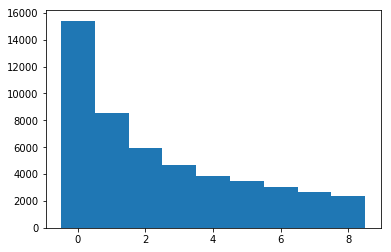

In [6]:
import collections
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

nums = list(np.random.lognormal(0, 1, 50000) * 100000)
# this would also be ok:
#nums = list(np.random.exponential(50000, 500000))

firstdigits = [str(x)[0] for x in nums]
counts = collections.Counter(firstdigits)
print(counts)
it = list(counts.items())
it.sort(key = lambda x: x[0])
labels, values = zip(*it)

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.show()


Note on that: I just constructed the histogram from a Python build-in Counter object using the code given [here](https://stackoverflow.com/questions/19198920/using-counter-in-python-to-build-histogram).  Because, why not do things the simple way?  But of course there are lots of ways to do this.  Also, I picked the parameters for the distributions just because they looked like incomes.  To verify this:

In [7]:
nums[0:10]

[47770.72873496541,
 162518.71482805922,
 365965.8701727127,
 55899.503502655134,
 47994.65898368454,
 16117.974400247373,
 28823.429892585027,
 62724.728324552445,
 593241.5217142677,
 266014.57099434023]

In [8]:
np.mean(nums)

163904.6548386263

In [9]:
np.median(nums)

99114.5775416875

Kinda high incomes, perhaps.  But not ridiculously so.